In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.6.0'

In [3]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

Thu Sep 30 08:26:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    77W / 149W |    121MiB / 11441MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Sep 15 01:08 '/content/drive/MyDrive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [6]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/datasets/dogs_and_cats_small.zip
replace test/cats/cat.1501.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test/cats/cat.1502.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: t

In [7]:
!ls -l

total 20
drwx------ 5 root root 4096 Sep 30 08:10 drive
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data
drwxr-xr-x 4 root root 4096 Sep 30 08:10 test
drwxr-xr-x 4 root root 4096 Sep 30 08:10 train
drwxr-xr-x 4 root root 4096 Sep 30 08:10 validation


In [8]:
train_dir = 'train'
valid_dir='validation'
test_dir = 'test'

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode = 'nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150,150),
                  batch_size=20,
                  class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode ='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [12]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch =100,
                       epochs = 100,
                       validation_data=valid_generator,
                       validation_steps =50)

Epoch 1/100
100/100 [==============================] - 23s 205ms/step - loss: 0.6940 - accuracy: 0.5085 - val_loss: 0.6929 - val_accuracy: 0.5040
Epoch 2/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6951 - accuracy: 0.5160 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
100/100 [==============================] - 20s 203ms/step - loss: 0.6934 - accuracy: 0.4850 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 7/100
100/100 [==============================] - 20s 205ms/step - loss: 0.6937 - accuracy: 0.4955 - val_loss: 0.6921 -

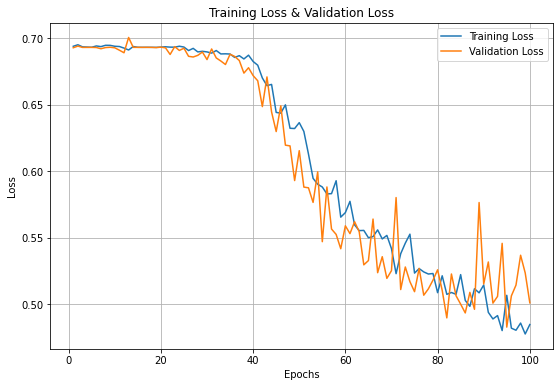

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training Loss & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

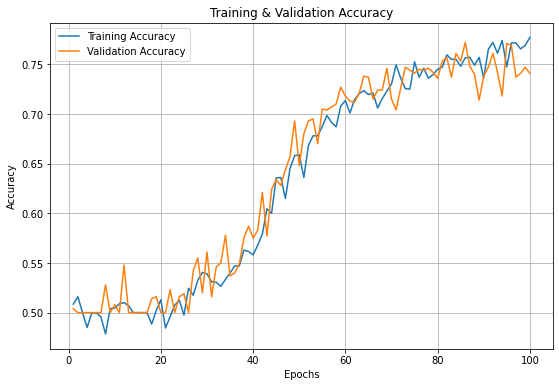

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size=(150,150),
                 batch_size=20,
                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
loss, accuracy = model.evaluate(test_generator,
                                steps =50)

print('Loss={:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 3s 65ms/step - loss: 0.5141 - accuracy: 0.7350
Loss=0.51410
Accuracy = 0.73500


In [18]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/003_dogs_and_cats_augmentation.h5')

In [19]:
!ls -l /content/drive/MyDrive/Colab\ Notebooks/models

total 81054
-rw------- 1 root root 41499544 Sep 30 09:03 002_dogs_and_cats_small.h5
-rw------- 1 root root 41499544 Sep 30 09:03 003_dogs_and_cats_augmentation.h5


In [20]:
from tensorflow.keras.models import load_model

model_small = load_model('/content/drive/MyDrive/Colab Notebooks/models/002_dogs_and_cats_small.h5')

In [21]:
loss, accuracy = model_small.evaluate(test_generator,
                                steps =50)

print('Loss={:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 4s 68ms/step - loss: 0.5141 - accuracy: 0.7350
Loss=0.51410
Accuracy = 0.73500


#The End#